In [62]:
import numpy as np
import sympy as sym
import pandas as pd
from IPython.display import display, Math
from typing import Iterable, List, Dict, Tuple, Union, Optional
import math
sym.init_printing()

In [63]:
def euclidian_distance2(feature_set_data: Iterable[Union[int, float]], feature_set_prediction: Iterable[Union[int, float]]) -> float:
    """
    param feature_set_data: should contain an iterable datatype with the features a point in the training data has.
    param feature_set_prediction: should contain an iterable datatype with the features point from which we want to predict the class.
    It doesn't really mattter if you swap the two tho.
    """

    # set up some basic thingies
    distance: float = 0

    # put the different values for the same feature together in a tuple. Then store those tuples in a list
    zipped = list(zip(feature_set_data, feature_set_prediction))
    # here we add the squared difference between the features
    for feature in zipped:
        distance+= (float(feature[0])-feature[1])**2
    
    #return the square root of this difference
    return math.sqrt(distance)



In [64]:
test1 = [1,2]
test= [3,4]
x= list(zip(test1, test))
print(x)

for z in x:
    print(z)

[(1, 3), (2, 4)]
(1, 3)
(2, 4)


In [65]:
class KNN_classifier:
    def __init__(self, k: int = 5):
        """Sets up the KNN classifier. 
        It requires the user to select a value for k, or go with the default value of 5."""
        self.k = 5
        self.data = None

    def feed_data(self, data: np.ndarray) -> None:
        """Takes in a iterable which contains nested interables.
        Each nested iterable stands for a row/instance in the dataset.
        And each (numerical) value stands for the value of a feature for that given instance.
        This method requires you to insert the data as a numpy array.

        !! THE LAST COLUMN MUST BE THE LABEL SET !!
        """

        self.data = data
        return None

    def add_row(self, row: np.ndarray) -> None:
        """allows user to add another row of data"""
        if not self.data:
            self.data=np.array(row)
        else:
            self.data.vstack(row)

        return None
    
    def predict(self, pred_point: Iterable[Union[int, float]]) -> str:
        """Here the class uses the KNN algorithm to predict whether class a particular point belongs to"""

        distances: Dict[float, Iterable[Union[float, int, str]]] = {}

        # here we go over each instance in the dataset 
        for instance in self.data:

            # and calculate the distance
            distance = euclidian_distance2(feature_set_data=instance, feature_set_prediction=pred_point)

            distances[distance] = instance


        ############---------WORKS---------############
        sorted_distances = sorted(list(distances.keys()))
        closest_points: List[Iterable[Union[float, int, str]]] = []

        index: int = 0
        while len(closest_points) != self.k:
            smallest_distance = sorted_distances[index]
            closest_points.append(distances[smallest_distance])
            index+=1
            
        # now we count the amount of neighbors each class has
        class_proportion_dict: Dict[Iterable[Union[float, int, str]], float] = {}
        for neighbor in closest_points:
            if neighbor[-1] not in class_proportion_dict:
                class_proportion_dict[neighbor[-1]] = 1.0
            else:
                class_proportion_dict[neighbor[-1]] += 1

        # and we end with returning the class which has the highest tally
        highest_tally: int = 0
        highest_class: str = None

        for c in class_proportion_dict:
            if class_proportion_dict[c] > highest_tally:
                highest_tally = class_proportion_dict[c]
                highest_class = c
            
            else:
                continue
        
        return highest_class

In [66]:
euclidian_distance2(feature_set_data=[-1,1, "red"], feature_set_prediction=[-4, 6])

In [67]:
a,b,c,d= sym.symbols("a,b,c,d")
eq = sym.sympify("sqrt((a - b)**2 + (c-d)**2)")

display(eq.subs({a:-1, b:-4, c: 1, d:6}))

print(math.sqrt(34))

display(eq)



5.830951894845301


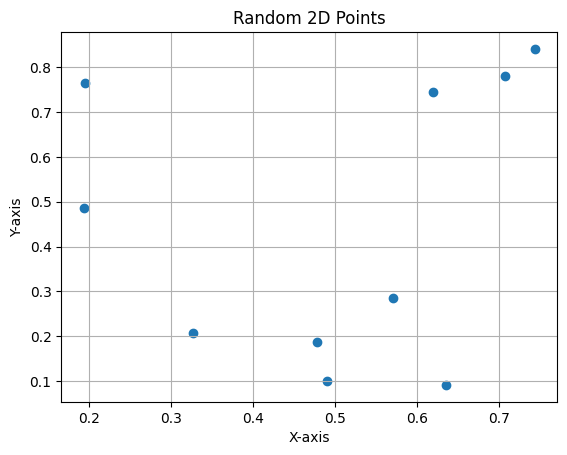

Generated 2D points:
[[0.63550376 0.09081753]
 [0.19315046 0.48592144]
 [0.74382725 0.84140099]
 [0.57126862 0.28590706]
 [0.19420286 0.76502665]
 [0.49022178 0.09877787]
 [0.47775842 0.1874677 ]
 [0.32688893 0.20739296]
 [0.70705181 0.77979917]
 [0.61922262 0.74571971]]


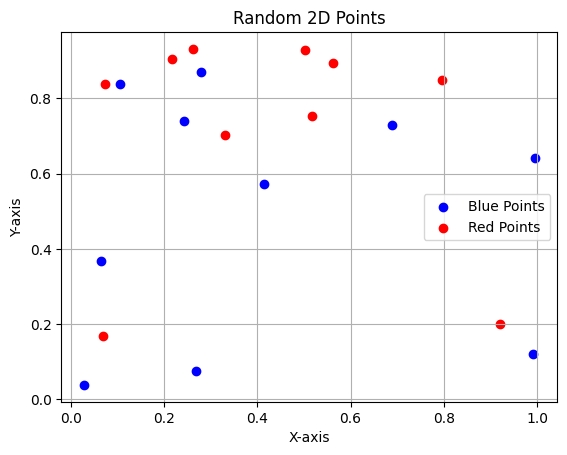

Generated 2D points:
Blue Points:
[[0.02770056 0.0386159 ]
 [0.68890193 0.72962662]
 [0.24279202 0.74121178]
 [0.99043428 0.12124594]
 [0.41432316 0.57271482]
 [0.27810667 0.87057413]
 [0.06531221 0.36719711]
 [0.26868938 0.07528001]
 [0.10470201 0.8390228 ]
 [0.99505694 0.64221511]]

Red Points:
[[0.21593631 0.90549629]
 [0.51619475 0.75307374]
 [0.26156236 0.93159167]
 [0.5628983  0.89417426]
 [0.33147078 0.70168394]
 [0.79704387 0.84957651]
 [0.07260498 0.8385533 ]
 [0.06850539 0.1677686 ]
 [0.9201316  0.20162394]
 [0.50246331 0.92964025]]


In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
num_points = 10

# Generate random 2D points
points = np.random.rand(num_points, 2)  # Generates num_points points in 2D space

# Plot the points
plt.scatter(points[:, 0], points[:, 1])
plt.title('Random 2D Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

# Print the points
print("Generated 2D points:")
print(points)

import numpy as np
import matplotlib.pyplot as plt

# Number of points
num_points = 10

# Generate random 2D points
points = np.random.rand(num_points, 2)  # Generates num_points points in 2D space

# Plot the blue points
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Blue Points')

# Generate additional random 2D points (red points)
additional_points = np.random.rand(num_points, 2)

# Plot the red points
plt.scatter(additional_points[:, 0], additional_points[:, 1], color='red', label='Red Points')

plt.title('Random 2D Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()  # Show legend
plt.grid(True)
plt.show()

# Print the points
print("Generated 2D points:")
print("Blue Points:")
print(points)
print("\nRed Points:")
print(additional_points)



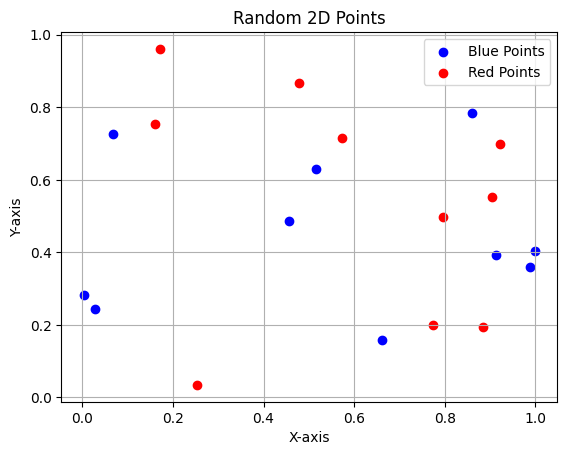

Generated 2D points with colors:
[['0.0029892432805331826' '0.2838442421541201' 'blue']
 ['0.6616257439809606' '0.15898065543574247' 'blue']
 ['0.9886662901298886' '0.3594145222923826' 'blue']
 ['0.026622559460003137' '0.2450006636925428' 'blue']
 ['0.06730631774533413' '0.7264374224298682' 'blue']
 ['0.9990366142275273' '0.4032095583981121' 'blue']
 ['0.515833144357997' '0.6298678919834004' 'blue']
 ['0.9123761472255185' '0.3917959939009905' 'blue']
 ['0.861081330762827' '0.7853996755328571' 'blue']
 ['0.45699976321417535' '0.487009740383224' 'blue']
 ['0.25320537824799416' '0.03461639823125784' 'red']
 ['0.5741110420156503' '0.7144357328238387' 'red']
 ['0.9046422497339026' '0.5516001472128723' 'red']
 ['0.9232489648507206' '0.6999337165027483' 'red']
 ['0.8841522239736376' '0.19522075069034062' 'red']
 ['0.1598391672824223' '0.7538141078597965' 'red']
 ['0.797240856379145' '0.49682606289830344' 'red']
 ['0.7738543585895375' '0.19961301515245577' 'red']
 ['0.1720791372420486' '0.9609

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
num_points = 10

# Generate random 2D points
points = np.random.rand(num_points, 2)  # Generates num_points points in 2D space

# Generate additional random 2D points (red points)
additional_points = np.random.rand(num_points, 2)

# Combine all points with their respective colors
# For blue points, 'blue' is used as the color, and for red points, 'red' is used
points_with_color = np.vstack((np.hstack((points, np.full((num_points, 1), 'blue'))),
                               np.hstack((additional_points, np.full((num_points, 1), 'red')))))

# Plot the points
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Blue Points')
plt.scatter(additional_points[:, 0], additional_points[:, 1], color='red', label='Red Points')

plt.title('Random 2D Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()  # Show legend
plt.grid(True)
plt.show()

# Print the points with color
print("Generated 2D points with colors:")
print(points_with_color)


In [70]:
# show(points_with_color)



In [76]:
matrix = []
for line in points_with_color:
    new_line = []
    for thing in line:
        if thing == line[0] or thing == line[1]:
            new_line.append((float(thing)))
        else:
            new_line.append(thing)
    matrix.append(new_line)

knn = KNN_classifier(k=3)
knn.feed_data(matrix)
knn.predict([0.1, 0.5])






'blue'